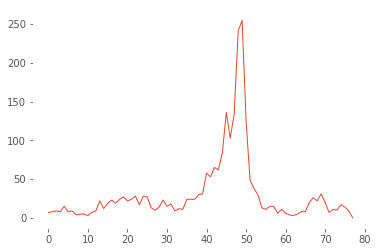

In [1]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['lines.linewidth']=1
plt.rcParams['axes.facecolor']='w'

n_t_d = []
with open("province-biweek_with_delays.csv") as f:
    i = 0
    for line in f.readlines():
        if i > 0:
            n_t_d.append(line.replace("\n","").split(','))
        i+=1

n_t_d_1 = []

for elm in n_t_d:
    if elm[2] == "13":
        n_t_d_1.append(elm)


index_to_dates = {}
dates_to_index = {}
count = 0
for i in ["2014","2015","2016"]:
    for j in range(1,27):
        index_to_dates[count] = str(i)+str(j)
        dates_to_index[str(i)+str(j)] = count
        count +=1
        
reporting_matrix = np.zeros((26*3,26*3))

for elm in n_t_d_1:
    try:
        sick_date = elm[0]+elm[1]
        report_date = elm[-2] + elm[-1]
        cases = elm[3]
        reporting_matrix_row = dates_to_index[sick_date] 
        reporting_matrix_col =  dates_to_index[report_date] 
        reporting_matrix[reporting_matrix_row,reporting_matrix_col] = int(cases)
    except:
        pass
#np.set_printoptions(threshold=np.nan)

plt.plot(reporting_matrix.sum(axis=1))
plt.show()

In [2]:
D=26
n_t_d = np.zeros((len(reporting_matrix),D))

for i in range(len(reporting_matrix)):
    for j in range(i,i+D):
        try:
            n_t_d[i,j-i] = reporting_matrix[i][j]
        except:
            pass
n_t_d = n_t_d[:-1]
p_hat = []
from matplotlib.pyplot import cm

for i in range(len(n_t_d)):
    p_hat.append(n_t_d[i]/np.sum(n_t_d[i]))
    
p_hat = np.array(p_hat)

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x104c2bea8>, 'n': 27, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10b93acb0>, 'result': <pydlm.func._dlm._result instance at 0x10b8455f0>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.13, 8.3, 4.23, 5.5, 5.61, 3.44, 8.19, 10.76, 24.44, 15.0, 21.74, 28.81, 24.15, 30.25, 36.67, 26.05, 34.19, 41.25, 26.71, 45.29, 41.67, 15.17], 'options': <pydlm.func._dlm._defaultOptions instance at 0x104c2be60>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1', 497.40398177757527)
('MSE of 10 step ahead forecast Model 2

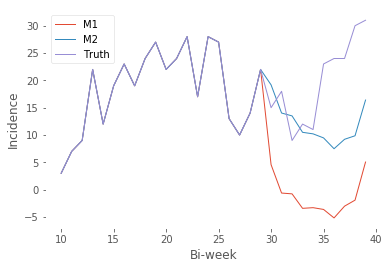

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10b8300e0>, 'n': 28, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10b830128>, 'result': <pydlm.func._dlm._result instance at 0x10b83dfc8>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.12, 4.12, 5.22, 5.38, 3.28, 7.78, 10.16, 22.95, 14.0, 20.17, 26.55, 22.11, 27.5, 33.09, 23.33, 30.38, 36.35, 23.33, 39.2, 35.71, 17.87, 16.28], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10b8301b8>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1', 1214.9017827922128)
('MSE of 10 step ahead forecast M

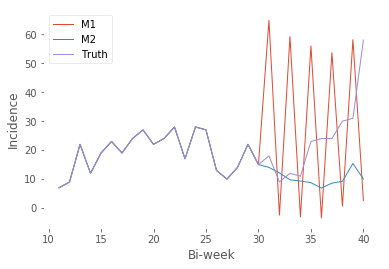

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10b9c60e0>, 'n': 29, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x104cbb0e0>, 'result': <pydlm.func._dlm._result instance at 0x104d54878>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.05, 5.13, 5.2, 3.21, 7.59, 9.9, 22.32, 13.59, 19.83, 26.06, 21.66, 26.89, 32.29, 22.72, 29.52, 35.24, 22.57, 37.82, 34.38, 16.8, 14.53, 22.0], 'options': <pydlm.func._dlm._defaultOptions instance at 0x104caef80>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1', 781.9217510113255)
('MSE of 10 step ahead forecas

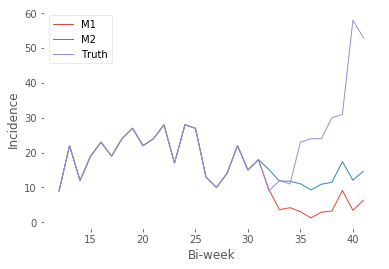

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10b83d560>, 'n': 30, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x104cbb320>, 'result': <pydlm.func._dlm._result instance at 0x104cbb368>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.06, 5.12, 3.11, 7.44, 9.68, 21.79, 13.25, 19.01, 25.27, 20.96, 25.97, 31.13, 21.86, 28.33, 33.75, 21.57, 36.06, 32.69, 15.94, 13.49, 19.51, 28.33], 'options': <pydlm.func._dlm._defaultOptions instance at 0x104c778c0>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1', 1380.9931633613382)
('MSE of 10 step ah

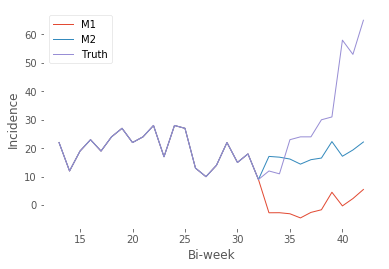

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bbbd3b0>, 'n': 31, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10bb29fc8>, 'result': <pydlm.func._dlm._result instance at 0x10bc58998>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.06, 3.07, 7.24, 9.54, 21.45, 13.02, 18.68, 24.48, 20.54, 25.43, 30.45, 21.36, 27.66, 32.92, 21.01, 35.1, 31.79, 16.77, 13.09, 18.6, 26.02, 21.89], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bbbde60>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1', 113026.01598508489)
('MSE of 10 ste

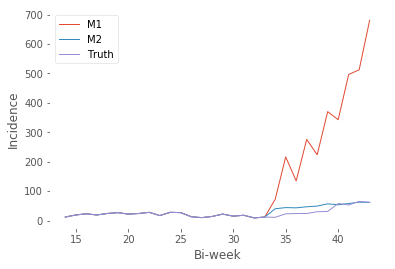

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bcfb998>, 'n': 32, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10bb266c8>, 'result': <pydlm.func._dlm._result instance at 0x10bb263b0>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.03, 7.15, 9.3, 23.24, 12.82, 20.53, 25.14, 21.01, 27.18, 30.95, 25.53, 28.2, 33.32, 20.49, 34.18, 33.39, 16.29, 12.7, 18.03, 24.81, 20.14, 24.21], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bceeb90>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1', 1099.9743316284923)
('MSE of 1

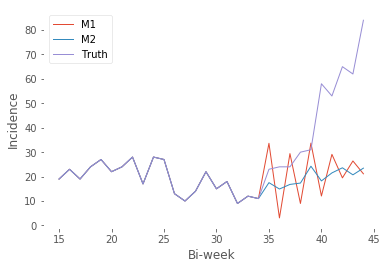

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10be3c4d0>, 'n': 33, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10bed4758>, 'result': <pydlm.func._dlm._result instance at 0x10bed4290>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.07, 9.19, 22.69, 12.64, 20.23, 24.75, 20.67, 26.4, 30.37, 25.03, 27.63, 32.61, 20.04, 33.4, 32.6, 15.89, 12.38, 17.54, 24.12, 19.29, 22.44, 12.91], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10be3c488>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1', 3312.622872893172)
('MSE

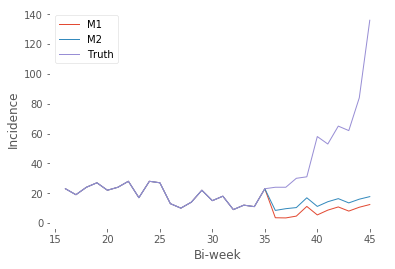

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bbbd5a8>, 'n': 34, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10c09a488>, 'result': <pydlm.func._dlm._result instance at 0x10bf1d950>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.09, 22.44, 12.36, 19.98, 24.44, 20.4, 26.04, 29.61, 24.66, 27.2, 32.09, 19.7, 32.83, 32.02, 15.6, 12.14, 17.2, 23.63, 18.89, 21.68, 11.77, 17.0], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bf7c248>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1', 3082.0340606089962)
(

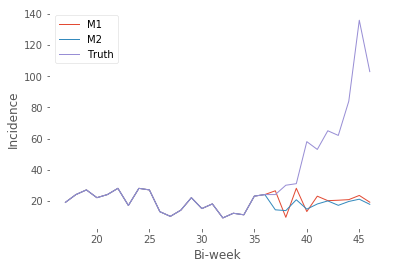

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10b8966c8>, 'n': 35, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x102cb2cf8>, 'result': <pydlm.func._dlm._result instance at 0x10337a998>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.2, 12.22, 19.54, 24.11, 20.11, 25.65, 29.14, 23.98, 26.69, 31.46, 19.3, 32.13, 31.31, 15.24, 11.98, 16.96, 23.27, 18.58, 21.3, 11.41, 15.57, 15.37], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10b87ba28>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1', 3412.5397465

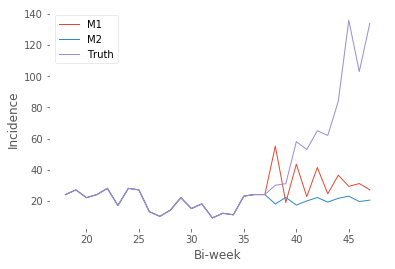

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bcfb8c0>, 'n': 36, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10b87d3b0>, 'result': <pydlm.func._dlm._result instance at 0x10c146e60>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.1, 19.33, 23.6, 19.84, 25.29, 28.7, 23.6, 25.98, 30.88, 18.92, 31.47, 30.63, 14.89, 11.57, 16.52, 22.65, 18.06, 20.68, 11.06, 14.91, 13.96, 32.86], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bcfb170>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1', 11752.2

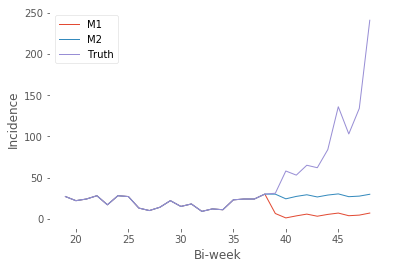

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10b87b7e8>, 'n': 37, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10b87b3b0>, 'result': <pydlm.func._dlm._result instance at 0x10b837830>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.14, 23.33, 19.42, 24.89, 28.64, 23.51, 25.85, 30.39, 18.74, 31.11, 30.24, 14.68, 11.38, 16.07, 22.17, 17.65, 20.34, 10.86, 14.61, 13.51, 27.75, 34.64], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10b99bb48>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Model 1

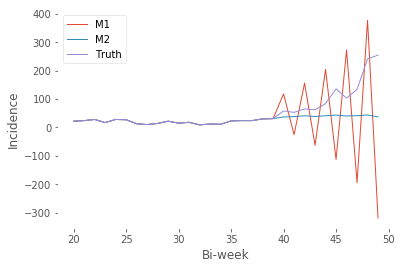

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bef3e60>, 'n': 38, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10b896710>, 'result': <pydlm.func._dlm._result instance at 0x10bef36c8>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.15, 19.25, 24.48, 27.92, 23.22, 25.51, 29.97, 18.33, 30.62, 29.74, 14.42, 11.18, 15.76, 24.96, 17.27, 20.89, 10.6, 14.36, 13.27, 27.97, 29.9, 33.78], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bef3f38>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecast Mod

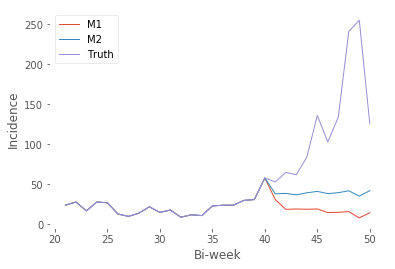

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bd060e0>, 'n': 39, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x104caecf8>, 'result': <pydlm.func._dlm._result instance at 0x10c146dd0>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.11, 24.28, 27.48, 22.66, 25.18, 29.56, 18.28, 30.3, 29.6, 14.34, 11.1, 15.65, 24.75, 16.99, 20.66, 10.47, 14.15, 13.15, 27.89, 29.31, 29.96, 41.71], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bd06440>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead forecas

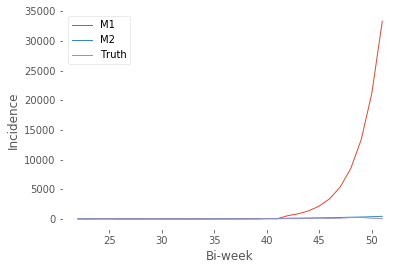

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10b9a9b00>, 'n': 40, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10c173128>, 'result': <pydlm.func._dlm._result instance at 0x10c0b0e60>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.12, 27.28, 22.35, 24.63, 29.2, 17.83, 29.85, 29.1, 14.17, 10.96, 15.43, 24.39, 16.72, 20.18, 10.21, 13.78, 12.86, 27.21, 28.74, 29.66, 37.79, 42.96], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10b9a9bd8>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step ahead 

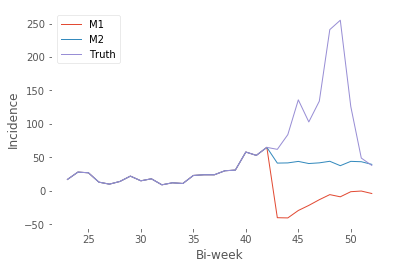

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10b9a9098>, 'n': 41, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10bcee8c0>, 'result': <pydlm.func._dlm._result instance at 0x10bdaec20>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.13, 22.21, 24.34, 28.67, 17.66, 29.24, 28.61, 13.91, 10.87, 15.29, 24.15, 16.55, 19.97, 10.04, 13.52, 12.53, 26.62, 28.09, 28.4, 36.51, 39.07, 79.7], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10c02c050>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 step 

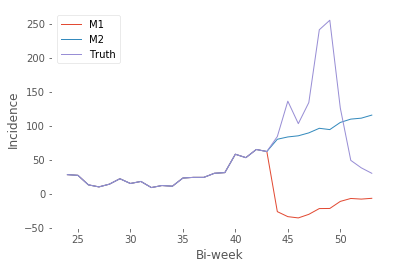

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bb28050>, 'n': 42, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10b9dcb00>, 'result': <pydlm.func._dlm._result instance at 0x10be31440>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.09, 24.2, 28.36, 17.37, 28.98, 28.07, 13.69, 10.63, 15.08, 24.03, 16.46, 19.84, 9.97, 13.35, 12.36, 26.08, 27.61, 27.88, 35.2, 37.29, 71.97, 69.63], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bb28098>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE of 10 

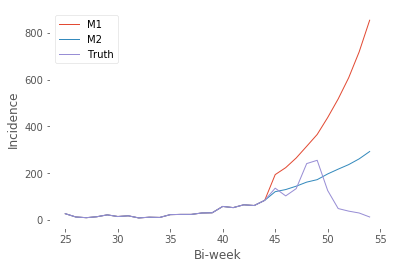

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10c110128>, 'n': 43, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10c01ef80>, 'result': <pydlm.func._dlm._result instance at 0x10c01eb90>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.09, 28.21, 17.2, 28.54, 27.84, 13.46, 10.48, 14.78, 23.51, 16.23, 19.64, 9.86, 13.2, 12.15, 25.62, 26.96, 27.31, 34.43, 35.89, 68.97, 63.56, 84.95], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bb3f368>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('MSE 

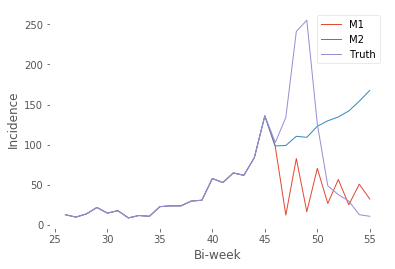

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10b9a9488>, 'n': 44, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10b9fa050>, 'result': <pydlm.func._dlm._result instance at 0x10b9fa0e0>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.1, 17.12, 28.3, 27.48, 13.37, 10.32, 14.61, 23.13, 15.95, 19.35, 9.75, 13.25, 12.19, 25.6, 26.92, 27.13, 34.32, 35.75, 67.43, 61.97, 79.44, 79.3], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10c0f6b90>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
('

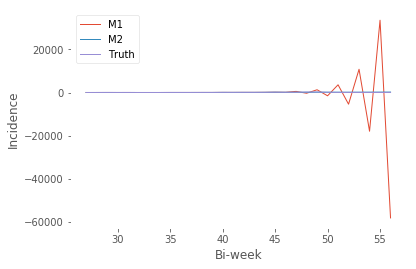

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bd637e8>, 'n': 45, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10c0de170>, 'result': <pydlm.func._dlm._result instance at 0x10c0de440>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.06, 28.18, 27.26, 13.21, 10.26, 14.42, 22.89, 15.71, 19.04, 9.62, 12.92, 12.05, 25.37, 26.57, 26.76, 33.7, 35.2, 66.35, 59.93, 76.62, 73.58, 109.87], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bd63950>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing comp

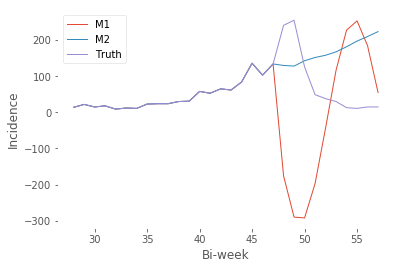

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bec4fc8>, 'n': 46, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10c1bb5a8>, 'result': <pydlm.func._dlm._result instance at 0x10c1bb170>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.08, 27.16, 13.12, 10.15, 14.34, 22.6, 15.55, 18.78, 9.48, 12.75, 11.77, 25.0, 26.25, 26.42, 33.25, 34.58, 65.35, 58.98, 74.22, 71.1, 100.68, 175.45], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bdaeb48>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothin

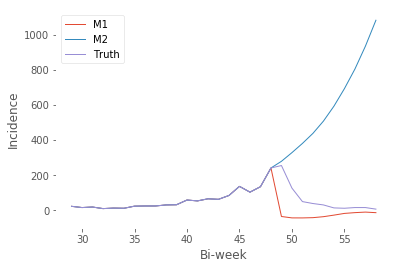

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x104cbb1b8>, 'n': 47, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10b93ad40>, 'result': <pydlm.func._dlm._result instance at 0x10b93acb0>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.08, 13.07, 10.09, 14.2, 22.51, 15.39, 18.63, 9.37, 12.6, 11.66, 24.52, 25.98, 26.13, 32.87, 34.18, 64.34, 58.23, 73.25, 69.19, 97.13, 161.47, 128.62], 'options': <pydlm.func._dlm._defaultOptions instance at 0x104cbb170>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward s

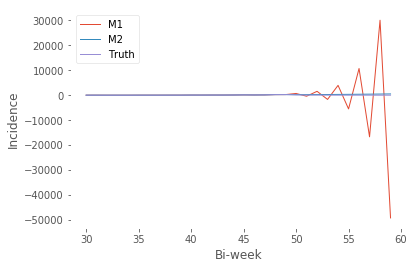

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bec4248>, 'n': 48, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10c1bbc20>, 'result': <pydlm.func._dlm._result instance at 0x10c1bbea8>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 13.03, 10.05, 14.11, 22.29, 15.32, 18.43, 9.29, 12.46, 11.51, 24.27, 25.46, 25.82, 32.46, 33.73, 63.47, 57.23, 72.16, 68.11, 94.35, 155.49, 119.47, 163.78], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bec4098>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
B

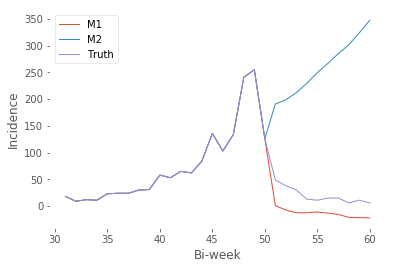

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10c046170>, 'n': 49, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10bec4710>, 'result': <pydlm.func._dlm._result instance at 0x10bec4290>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 13.0, 10.02, 14.07, 22.16, 15.19, 18.36, 9.2, 12.36, 11.39, 23.99, 25.23, 25.36, 32.11, 33.36, 62.74, 56.55, 71.07, 67.59, 93.59, 152.35, 116.17, 151.42, 276.66], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10c046518>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothin

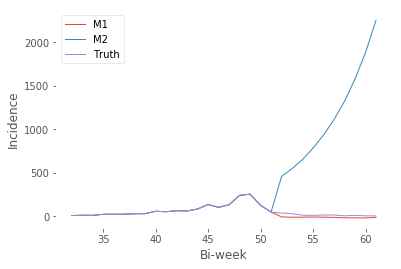

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10c1ba200>, 'n': 50, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10c1ba0e0>, 'result': <pydlm.func._dlm._result instance at 0x10c1ba050>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 13.0, 10.0, 14.03, 22.1, 15.11, 18.22, 9.17, 12.26, 11.32, 23.79, 25.0, 25.19, 31.65, 33.11, 62.27, 56.11, 70.5, 66.5, 92.77, 150.99, 114.14, 147.82, 276.58, 320.07], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10c1ba128>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoo

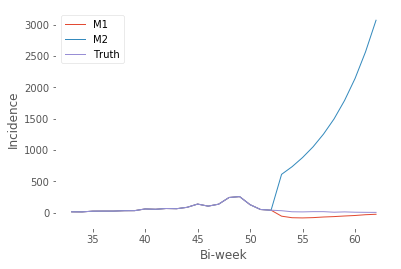

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10c116a70>, 'n': 51, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10c6afd88>, 'result': <pydlm.func._dlm._result instance at 0x10c6af050>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 13.0, 10.0, 14.0, 22.05, 15.07, 18.13, 9.11, 12.23, 11.23, 23.66, 24.8, 24.98, 31.45, 32.66, 61.86, 55.73, 70.01, 66.03, 91.39, 149.84, 112.96, 145.08, 269.77, 295.23, 157.23], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10c0f7cb0>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting bac

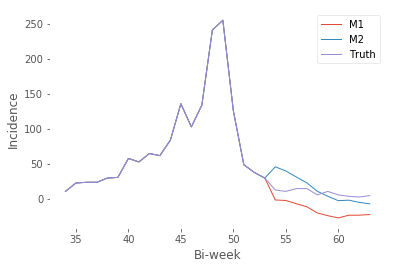

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10c16cb00>, 'n': 52, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10bae2998>, 'result': <pydlm.func._dlm._result instance at 0x10bae2dd0>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 13.0, 10.0, 14.0, 22.0, 15.03, 18.08, 9.06, 12.14, 11.2, 23.47, 24.66, 24.78, 31.19, 32.45, 61.0, 55.34, 69.51, 65.55, 90.7, 147.55, 112.02, 143.48, 264.64, 287.84, 145.16, 45.81], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10c16cfc8>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting

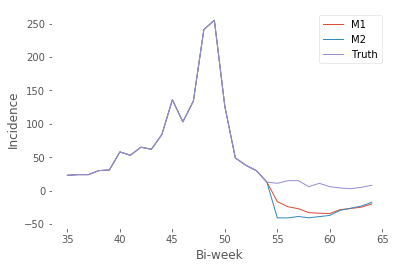

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bb4a320>, 'n': 53, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10bb4a560>, 'result': <pydlm.func._dlm._result instance at 0x10bb4a200>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 13.0, 10.0, 14.0, 22.0, 15.0, 18.04, 9.04, 12.08, 11.12, 23.4, 24.47, 24.63, 30.92, 32.17, 60.58, 54.56, 68.97, 65.02, 89.95, 147.31, 110.99, 143.12, 263.26, 284.07, 142.4, 42.64, 34.56], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bb45950>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
S

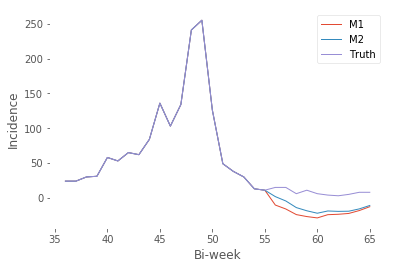

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10c143368>, 'n': 54, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10bd02c20>, 'result': <pydlm.func._dlm._result instance at 0x10b985f38>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 13.0, 10.0, 14.0, 22.0, 15.0, 18.0, 9.02, 12.05, 11.07, 23.24, 24.4, 24.45, 30.76, 31.92, 60.11, 54.24, 68.1, 64.6, 89.35, 145.31, 110.2, 141.08, 261.21, 281.14, 139.87, 41.65, 32.11, 31.86], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10bd02ef0>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering complete

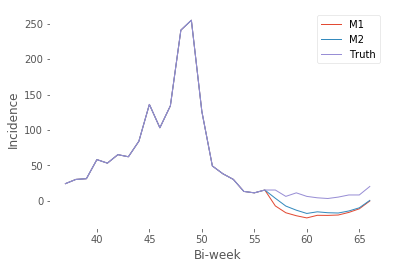

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10c143320>, 'n': 55, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10b9f0908>, 'result': <pydlm.func._dlm._result instance at 0x10b9f05a8>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 13.0, 10.0, 14.0, 22.0, 15.0, 18.0, 9.0, 12.02, 11.04, 23.14, 24.24, 24.39, 30.55, 31.76, 59.66, 53.82, 67.7, 63.8, 88.77, 144.34, 108.71, 140.04, 257.49, 279.5, 138.71, 41.0, 31.45, 33.16, 10.97], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10c143680>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering co

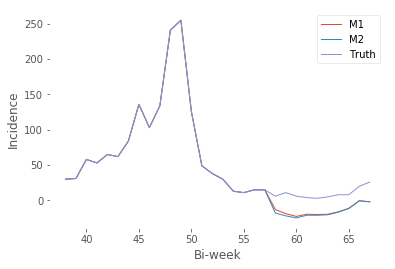

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10b9f0e18>, 'n': 56, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x104d54368>, 'result': <pydlm.func._dlm._result instance at 0x10c0f7f80>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 13.0, 10.0, 14.0, 22.0, 15.0, 18.0, 9.0, 12.0, 11.02, 23.09, 24.14, 24.24, 30.48, 31.56, 59.39, 53.46, 67.24, 63.48, 87.78, 143.59, 108.14, 138.4, 256.04, 275.49, 137.87, 40.66, 30.97, 32.5, 10.27, 10.92], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10b9f0c68>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fit

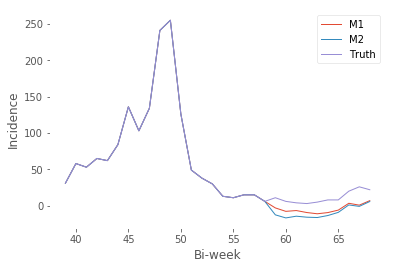

In [6]:
from scipy.special import expit
import matplotlib.pyplot as plt

variance_level_results = []
import sys
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
from sklearn.metrics import mean_squared_error

cv_mse = []
w_max = .8
for cutoff in np.arange(30,60,1):



    rmse_vec = []
    sim_data_var = []
    #iterate over all 10 seasons doing a leave one season out
    sim_n_t_d = n_t_d[:cutoff]

    train = sim_n_t_d[:cutoff]#[sim_n_t_d[x] for x in range(10) if x not in [season_for_leave_out]]
    #test = sim_n_t_d[season_for_leave_out]


    train = np.array(train)
    train_n_t_d = train.reshape((-1,D))
    ts = train_n_t_d.sum(axis=1)
    data_to_be_scaled_down  = train_n_t_d[len(ts)-D:]




    delayed_data = []
    count = D
    for i in range(len(data_to_be_scaled_down)):
        tmp = data_to_be_scaled_down[i][:count].tolist()
        while len(tmp) <D:
            tmp.append(0)
        delayed_data.append(tmp)
        count -=1 


    training_data = np.append(train_n_t_d[:len(ts)-D],delayed_data,axis=0)

    k = np.array(train_n_t_d).shape[1 ]
    p_vec_noise = np.ones(k)

    for i in range(len(ts)-D):
        p_vec_noise += train_n_t_d[i]

    p_vec_noise = p_vec_noise/np.sum(p_vec_noise)
    #### training data is all set

    ###filling in ps model 1
    model_1_delay = []
    count = D
    for i in range(len(delayed_data)):
        delay_forecast = np.sum(delayed_data[i])/np.sum(p_vec_noise[:count])
        model_1_delay.append(np.round(delay_forecast,2))
        count -= 1
    model_1_delay = np.array(model_1_delay)



    #### train on all but the last LO estimates 
    LO=3

    process_training_data = np.append(ts[:len(ts)-D],model_1_delay[:D-LO],axis=0)
    from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
    myDLM = dlm(process_training_data)
    myDLM = myDLM + seasonality(26, name='7day', w=1.0)
    myDLM = myDLM + autoReg(degree=2, data=process_training_data, name='ar2', w=1.0)
    myDLM.fit()
    print (myDLM.__dict__)

    (process_model_forecast, predictVar) = myDLM.predictN(N=LO, date=myDLM.n-1)
    #process_model_forecast_2 = process_model(ts[len(ts)-D:],D)[-1]
    #process_model_forecast = (np.array(process_model_forecast)+np.array(process_model_forecast_2))/2
    #plt.plot(process_model_forecast)
    #plt.plot(ts[len(ts)-D:])
    #plt.show()

    #predictVar = np.repeat(10,D)
    model_2_delay = []
    count = D
    for i in np.arange(LO,0,-1):
        tmp = process_model_forecast[LO-i]#bayes_estimate(p_vec_noise[:i],process_model_forecast[LO-i],predictVar[i],delayed_data[len(delayed_data)-i],.1)
        model_2_delay.append(np.round(tmp,2))
        count -= 1

    model_2_delay = np.append(model_1_delay[:D-LO],model_2_delay)
    #print ("model 2")
    #print (model_2_delay)
    #print ("model 1")
    #print (model_1_delay)
    #print ("truth")
    #print (ts[len(ts)-D:])
    #print ("process model")
    #print (process_model_forecast)
    model_average = w_max*np.array(model_2_delay) + (1-w_max)*np.array(model_1_delay)


    ###Evaluate forecasts
   
    model_1_fs = np.append(ts[:(len(ts)-D)],model_1_delay)

    model_2_fs = np.append(ts[:(len(ts)-D)],model_average)



    myDLM = dlm(model_1_fs)
    myDLM = myDLM + seasonality(26, name='7day', w=1.0)
    myDLM = myDLM + autoReg(degree=2, data=model_1_fs, name='ar2', w=1.0)
    myDLM.fit()
    (process_model_forecast_1, predictVar) = myDLM.predictN(N=10, date=myDLM.n-1)

    myDLM = dlm(model_2_fs)
    myDLM = myDLM + seasonality(26, name='7day', w=1.0)
    myDLM = myDLM + autoReg(degree=2, data=model_2_fs, name='ar2', w=1.0)
    myDLM.fit()
    (process_model_forecast_2, predictVar) = myDLM.predictN(N=10, date=myDLM.n-1)

   
    print ("MSE of 10 step ahead forecast Model 1",mean_squared_error(process_model_forecast_1,n_t_d.sum(axis=1)[cutoff:cutoff+10]))
    print ("MSE of 10 step ahead forecast Model 2",mean_squared_error(process_model_forecast_2,n_t_d.sum(axis=1)[cutoff:cutoff+10]))
    cv_mse.append([mean_squared_error(process_model_forecast_1,n_t_d.sum(axis=1)[cutoff:cutoff+10]),mean_squared_error(process_model_forecast_2,n_t_d.sum(axis=1)[cutoff:cutoff+10])])
    plt.plot(range(cutoff-20,cutoff + 10),np.append(n_t_d.sum(axis=1)[(cutoff-20):(cutoff)],process_model_forecast_1))
    plt.plot(range(cutoff-20,cutoff + 10),np.append(n_t_d.sum(axis=1)[(cutoff-20):(cutoff)],process_model_forecast_2))
    plt.plot(range(cutoff-20,cutoff+10),n_t_d.sum(axis=1)[(cutoff-20):(cutoff+10)])
    plt.ylabel("Incidence")
    plt.xlabel("Bi-week")
    plt.legend(("M1","M2","Truth"))
    plt.show()


In [7]:
from scipy import stats
print (np.mean(cv_mse,axis=0))

print (stats.mode(cv_mse))

[35383981.17627301   179378.86601795]
ModeResult(mode=array([[254.22541455, 134.93898947]]), count=array([[1, 1]]))


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10bbb30e0>, 'n': 42, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10bd9d998>, 'result': <pydlm.func._dlm._result instance at 0x10bd9d7e8>, 'time': None, 'initialized': True, 'data': [6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 13.0, 9.0, 8.02, 15.07, 7.05, 8.08, 4.07, 5.1, 5.14, 3.1, 7.28, 9.43, 21.06, 12.8, 18.22, 23.71, 19.5], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10c18c8c0>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
(186.87081090209278, 69.76829

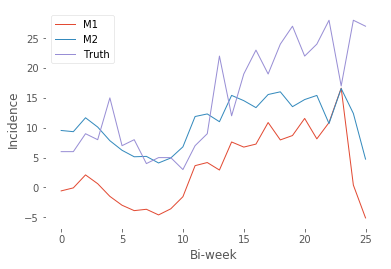

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10c1685a8>, 'n': 42, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10b862488>, 'result': <pydlm.func._dlm._result instance at 0x10b8624d0>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 9.0, 8.02, 15.07, 7.05, 8.1, 4.08, 5.11, 5.15, 3.11, 7.3, 9.46, 21.13, 12.85, 18.29, 23.8, 19.58], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10c168560>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
(235.45308241050876, 81.89205

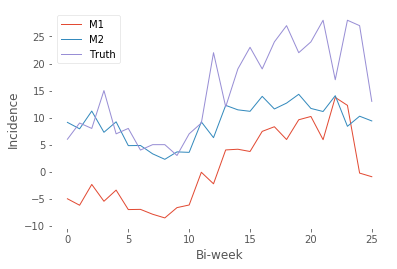

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
{'plotLibLoaded': False, 'builder': <pydlm.modeler.builder.builder instance at 0x10c18ccb0>, 'n': 42, 'Filter': <pydlm.base.kalmanFilter.kalmanFilter instance at 0x10c18c998>, 'result': <pydlm.func._dlm._result instance at 0x10c18cef0>, 'time': None, 'initialized': True, 'data': [6.0, 6.0, 9.0, 8.0, 15.0, 7.0, 8.0, 4.0, 5.0, 5.0, 3.0, 7.0, 9.0, 22.0, 12.0, 19.0, 23.0, 19.0, 24.0, 27.0, 22.0, 24.0, 28.0, 17.0, 28.0, 27.0, 6.0, 9.02, 8.04, 15.11, 7.09, 8.16, 4.09, 5.15, 5.18, 3.13, 7.36, 9.51, 21.41, 12.91, 18.39, 23.93], 'options': <pydlm.func._dlm._defaultOptions instance at 0x10c18c170>, '_printInfo': True}
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
(109.1910707684197, 46.8929

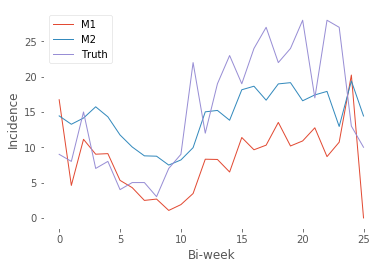

In [9]:
from scipy.special import expit
import matplotlib.pyplot as plt

variance_level_results = []
import sys
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
from sklearn.metrics import mean_squared_error

cv_mse = []
season_data = []

for i in range(3):
    season_data.append(n_t_d[i:(i+26)])
    
season_data = np.array(season_data)

for season_for_leave_out in np.arange(3):
    
    #iterate over all 10 seasons doing a leave one season out
    sim_n_t_d = season_data#[:cutoff]

    train = [sim_n_t_d[x] for x in range(3) if x not in [season_for_leave_out]]
    test = sim_n_t_d[season_for_leave_out]
    
    train = np.array(train)
    train_n_t_d = train.reshape((-1,D))
    ts = train_n_t_d.sum(axis=1)
    
    data_to_be_scaled_down  = train_n_t_d[len(ts)-D:]
    



    delayed_data = []
    count = D
    for i in range(len(data_to_be_scaled_down)):
        tmp = data_to_be_scaled_down[i][:count].tolist()
        while len(tmp) <D:
            tmp.append(0)
        delayed_data.append(tmp)
        count -=1 


    training_data = np.append(train_n_t_d[:len(ts)-D],delayed_data,axis=0)

    k = np.array(train_n_t_d).shape[1 ]
    p_vec_noise = np.ones(k)

    for i in range(len(ts)-D):
        p_vec_noise += train_n_t_d[i]

    p_vec_noise = p_vec_noise/np.sum(p_vec_noise)
    
    
    model_1_delay = []
    count = D
    for i in range(len(delayed_data)):
        delay_forecast = np.sum(delayed_data[i])/np.sum(p_vec_noise[:count])
        model_1_delay.append(np.round(delay_forecast,2))
        count -= 1
    model_1_delay = np.array(model_1_delay)



    #### train on all but the last LO estimates 
    LO=10

    process_training_data = np.append(ts[:len(ts)-D],model_1_delay[:D-LO],axis=0)
    
    from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
    myDLM = dlm(process_training_data)
    myDLM = myDLM + seasonality(26, name='7day', w=1.0)
    myDLM = myDLM + autoReg(degree=2, data=process_training_data, name='ar2', w=1.0)
    myDLM.fit()
    print (myDLM.__dict__)

    (process_model_forecast, predictVar) = myDLM.predictN(N=LO, date=myDLM.n-1)
    
    model_2_delay = []
    count = D
    for i in np.arange(LO,0,-1):
        tmp = process_model_forecast[LO-i]#bayes_estimate(p_vec_noise[:i],process_model_forecast[LO-i],predictVar[i],delayed_data[len(delayed_data)-i],.1)
        model_2_delay.append(np.round(tmp,2))
        count -= 1

    model_2_delay = np.append(model_1_delay[:D-LO],model_2_delay)
    
  
    model_average_end = model_1_delay[D-LO:]  
    
    #w_max*np.array(model_2_delay) + (1-w_max)*np.array(model_1_delay)


    ###Evaluate forecasts

    model_1_fs = np.append(ts[:len(ts)-D],model_1_delay)

    model_2_fs = np.append(ts[:len(ts)-D],model_average)



    myDLM = dlm(model_1_fs)
    myDLM = myDLM + seasonality(26, name='7day', w=1.0)
    myDLM = myDLM + autoReg(degree=2, data=model_1_fs, name='ar2', w=1.0)
    myDLM.fit()
    (process_model_forecast_1, predictVar) = myDLM.predictN(N=len(test), date=myDLM.n-1)

    myDLM = dlm(model_2_fs)
    myDLM = myDLM + seasonality(26, name='7day', w=1.0)
    myDLM = myDLM + autoReg(degree=2, data=model_2_fs, name='ar2', w=1.0)
    myDLM.fit()
    (process_model_forecast_2, predictVar) = myDLM.predictN(N=len(test), date=myDLM.n-1)

   
    mse1 = mean_squared_error(process_model_forecast_1,test.sum(axis=1))
    mse2 = mean_squared_error(process_model_forecast_2,test.sum(axis=1))
    cv_mse.append([mse1,mse2])
    print (mse1,mse2)
    plt.plot(range(len(test.sum(axis=1))),process_model_forecast_1)
    plt.plot(range(len(test.sum(axis=1))),process_model_forecast_2)
    plt.plot(range(len(test.sum(axis=1))),test.sum(axis=1))
    plt.ylabel("Incidence")
    plt.xlabel("Bi-week")
    plt.legend(("M1","M2","Truth"))
    plt.show()


In [10]:
print (np.mean(cv_mse,axis=0))

[177.17165469  66.18441889]
